In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Loading the dataset
data = pd.read_csv(r"C:\Users\Anuj\Downloads\online_gaming_behavior_dataset.csv\online_gaming_behavior_dataset.csv")
data.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


In [9]:
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

In [13]:
data[['Age','PlayTimeHours','InGamePurchases','SessionsPerWeek','AvgSessionDurationMinutes','PlayerLevel','AchievementsUnlocked']].describe()

,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
count,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000
mean,31.992531,12.024365,0.200854,9.471774,94.792252,49.655568,24.526477
std,10.043227,6.914638,0.400644,5.763667,49.011375,28.588379,14.430726
min,15.000000,0.000115,0.000000,0.000000,10.000000,1.000000,0.000000
25%,23.000000,6.067501,0.000000,4.000000,52.000000,25.000000,12.000000
50%,32.000000,12.008002,0.000000,9.000000,95.000000,49.000000,25.000000
75%,41.000000,17.963831,0.000000,14.000000,137.000000,74.000000,37.000000
max,49.000000,23.999592,1.000000,19.000000,179.000000,99.000000,49.000000


In [24]:
data['Gender'].value_counts()
data['Location'].value_counts()
data['GameGenre'].value_counts()
data['GameDifficulty'].value_counts()
data['EngagementLevel'].value_counts()

EngagementLevel
Medium    19374
High      10336
Low       10324
Name: count, dtype: int64

In [25]:
data[['Gender','Location','GameGenre','GameDifficulty','EngagementLevel']].apply(pd.Series.value_counts)

,Gender,Location,GameGenre,GameDifficulty,EngagementLevel
Action,NaN,NaN,8039.0,NaN,NaN
Asia,NaN,8095.0,NaN,NaN,NaN
Easy,NaN,NaN,NaN,20015.0,NaN
Europe,NaN,12004.0,NaN,NaN,NaN
Female,16075.0,NaN,NaN,NaN,NaN
Hard,NaN,NaN,NaN,8008.0,NaN
High,NaN,NaN,NaN,NaN,10336.0
Low,NaN,NaN,NaN,NaN,10324.0
Male,23959.0,NaN,NaN,NaN,NaN
Medium,NaN,NaN,NaN,12011.0,19374.0


PlayTimeHours                   Axes(0.125,0.11;0.227941x0.77)
SessionsPerWeek              Axes(0.398529,0.11;0.227941x0.77)
AvgSessionDurationMinutes    Axes(0.672059,0.11;0.227941x0.77)
dtype: object

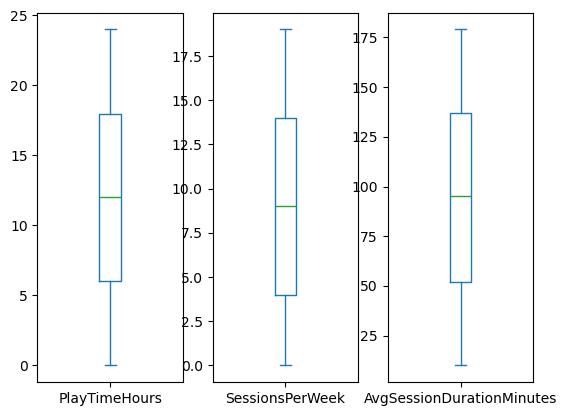

In [28]:
data[['PlayTimeHours','SessionsPerWeek','AvgSessionDurationMinutes']].plot(kind = "box", subplots = True, layout=(1,3))

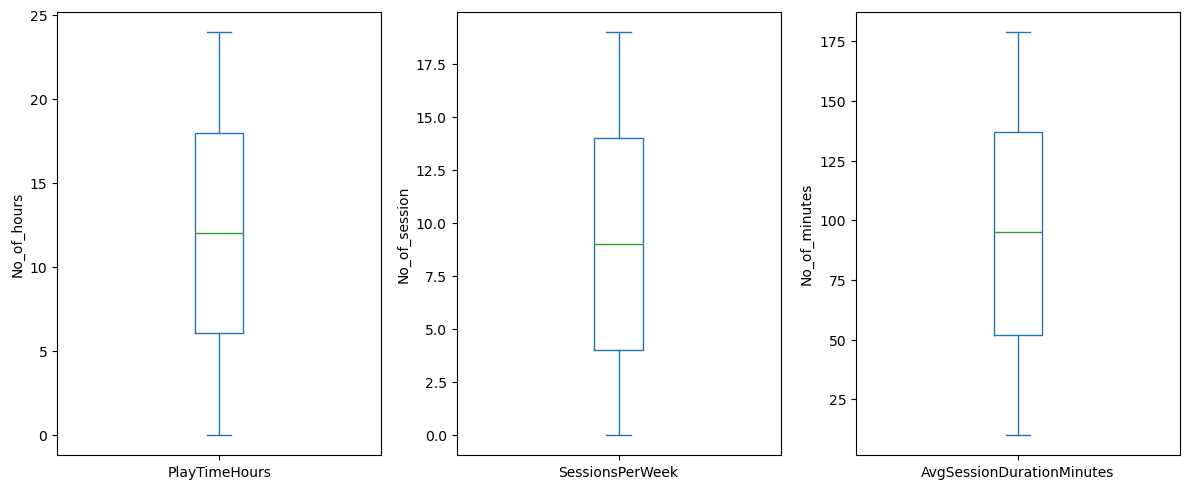

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(12,5))
data['PlayTimeHours'].plot(kind='box', ax=axes[0],)
axes[0].set_ylabel("No_of_hours")
data['SessionsPerWeek'].plot(kind='box', ax=axes[1],)
axes[1].set_ylabel("No_of_session")
data['AvgSessionDurationMinutes'].plot(kind='box', ax=axes[2],)
axes[2].set_ylabel("No_of_minutes")
plt.tight_layout()
plt.show()

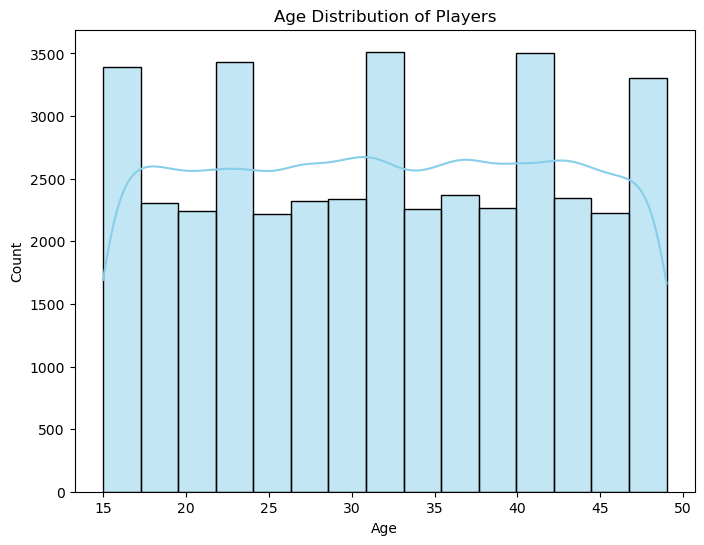

In [36]:
#Player Demographics
plt.figure(figsize=(8,6))
sns.histplot(data['Age'], bins = 15, kde = True, color = "skyblue", alpha = 0.5)
plt.title('Age Distribution of Players')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

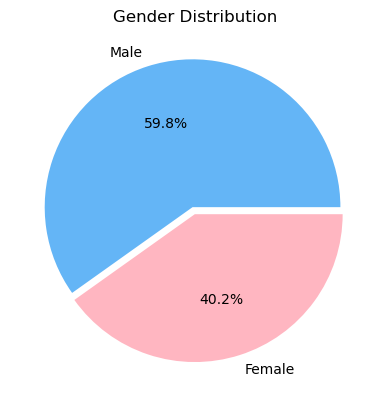

In [48]:
counts = data['Gender'].value_counts()
plt.pie(counts, labels = counts.index,autopct = '%.1f%%', colors = ['#64b5f6','#ffb6c1'], explode=(0.05,0))
plt.title("Gender Distribution")
plt.show()

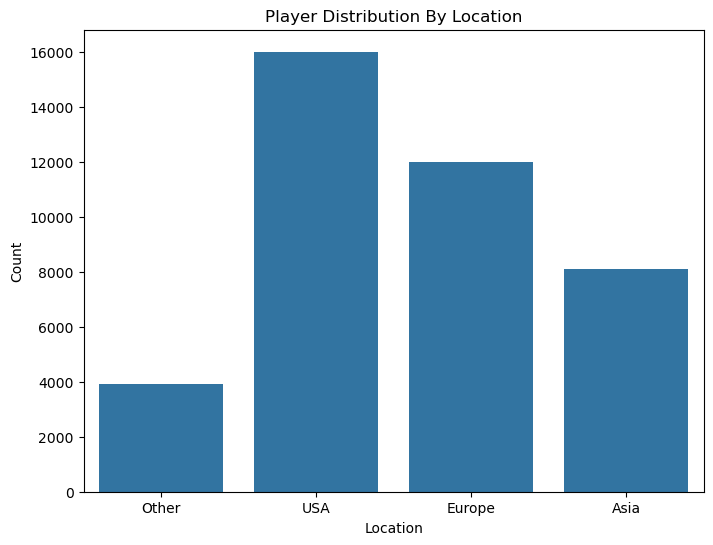

In [53]:
plt.figure(figsize=(8,6))
sns.countplot(data = data, x = 'Location')
plt.title("Player Distribution By Location")
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

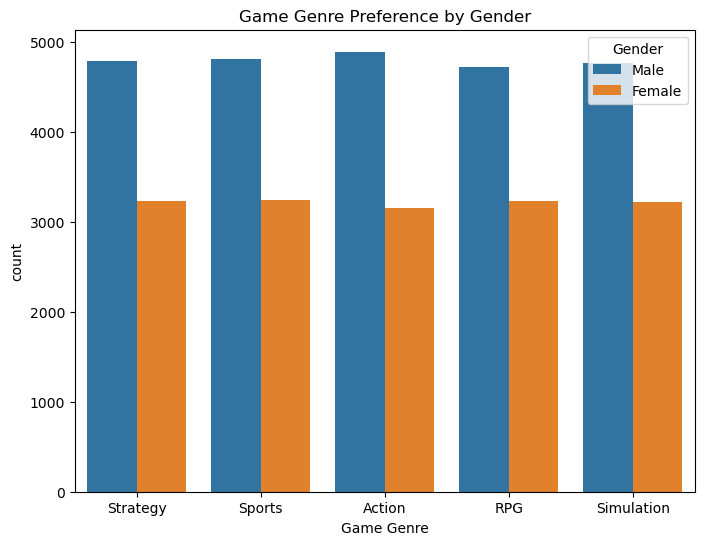

In [55]:
plt.figure(figsize=(8,6))
sns.countplot(data = data, x = 'GameGenre', hue = 'Gender')
plt.title("Game Genre Preference by Gender")
plt.xlabel('Game Genre')
plt.show()

C:\Users\Anuj\AppData\Local\Temp\ipykernel_25388\2378172932.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='EngagementLevel', y='PlayTimeHours', legend = False, palette=['#64b5f6','#ffb6c1','#81c784'])


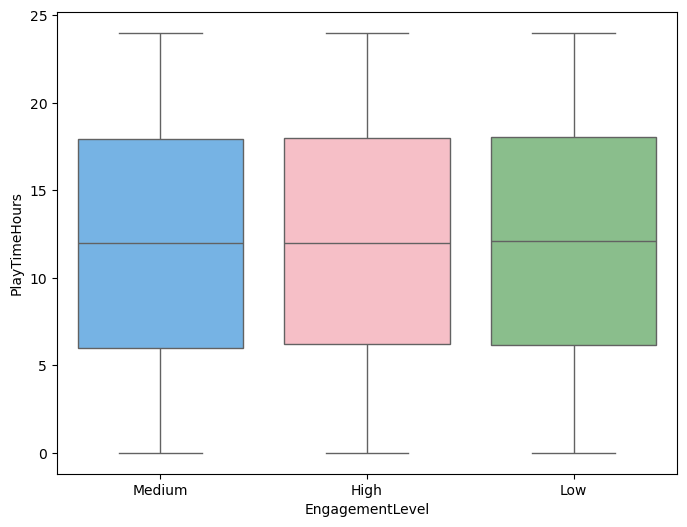

In [62]:
#Gaming Engagement Insights
plt.figure(figsize=(8,6))
sns.boxplot(data=data, x='EngagementLevel', y='PlayTimeHours', palette=['#64b5f6','#ffb6c1','#81c784'])
plt.show()

C:\Users\Anuj\AppData\Local\Temp\ipykernel_25388\3639223965.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='EngagementLevel', y='SessionsPerWeek', palette=['#64b5f6','#ffb6c1','#81c784'])


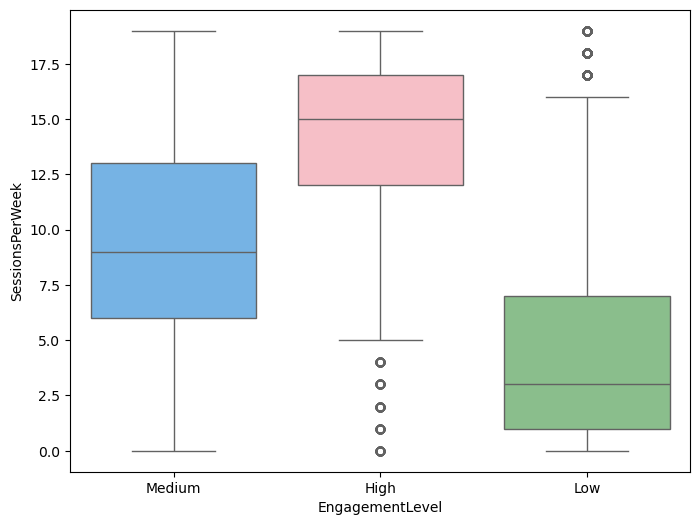

In [63]:
plt.figure(figsize=(8,6))
sns.boxplot(data=data, x='EngagementLevel', y='SessionsPerWeek', palette=['#64b5f6','#ffb6c1','#81c784'])
plt.show()

C:\Users\Anuj\AppData\Local\Temp\ipykernel_25388\3081601393.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='EngagementLevel', y='AvgSessionDurationMinutes', palette=['#64b5f6','#ffb6c1','#81c784'])


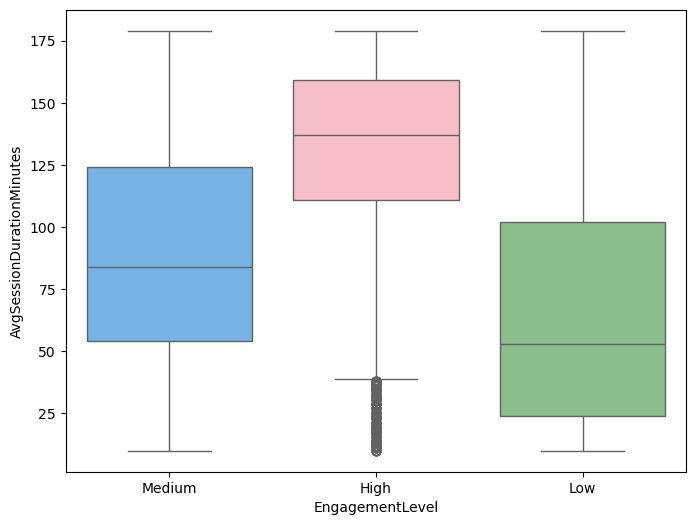

In [65]:
plt.figure(figsize=(8,6))
sns.boxplot(data=data, x='EngagementLevel', y='AvgSessionDurationMinutes', palette=['#64b5f6','#ffb6c1','#81c784'])
plt.show()

In [67]:
data.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


<Axes: >

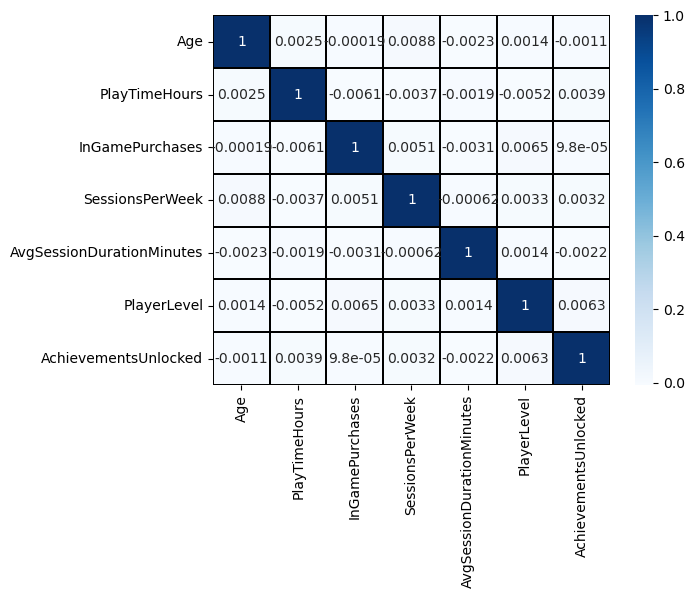

In [69]:
cols = data[['Age','PlayTimeHours','InGamePurchases','SessionsPerWeek','AvgSessionDurationMinutes','PlayerLevel','AchievementsUnlocked']]
sns.heatmap(data = cols.corr(), annot = True, cmap = 'Blues' , linewidth = 0.2, linecolor = 'Black')

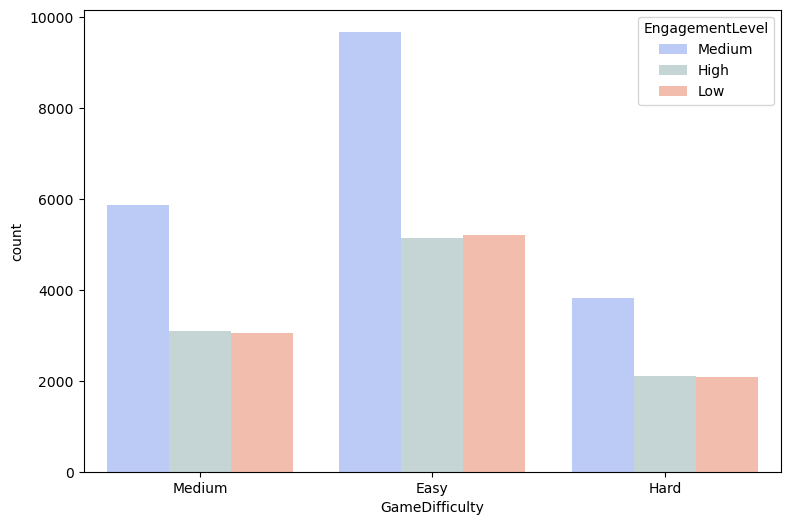

In [71]:
plt.figure(figsize=(9,6))
sns.countplot(data = data, x = "GameDifficulty", hue = "EngagementLevel",palette=['#b3c6ff', '#c2d6d6', '#ffb6a1'])
plt.legend(title = "EngagementLevel")
plt.show()

C:\Users\Anuj\AppData\Local\Temp\ipykernel_25388\2764909005.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = data, x = 'Gender', y = 'InGamePurchases', estimator = sum,palette=['#65b6a0', '#f4a382'])


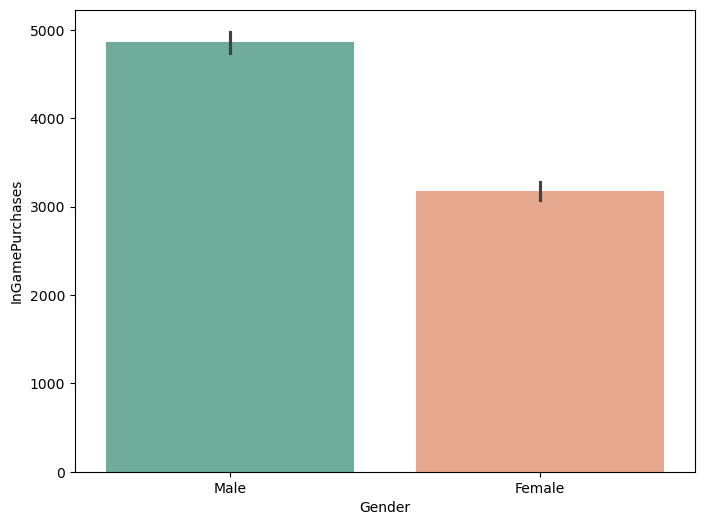

In [73]:
#In Game purchase Analysis
plt.figure(figsize=(8,6))
sns.barplot(data = data, x = 'Gender', y = 'InGamePurchases', estimator = sum,palette=['#65b6a0', '#f4a382'])
plt.show()

C:\Users\Anuj\AppData\Local\Temp\ipykernel_25388\267137714.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = data, x = 'Location', y = 'InGamePurchases', estimator = sum,palette=['#65b6a0', '#f4a382'])
C:\Users\Anuj\AppData\Local\Temp\ipykernel_25388\267137714.py:2: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data = data, x = 'Location', y = 'InGamePurchases', estimator = sum,palette=['#65b6a0', '#f4a382'])


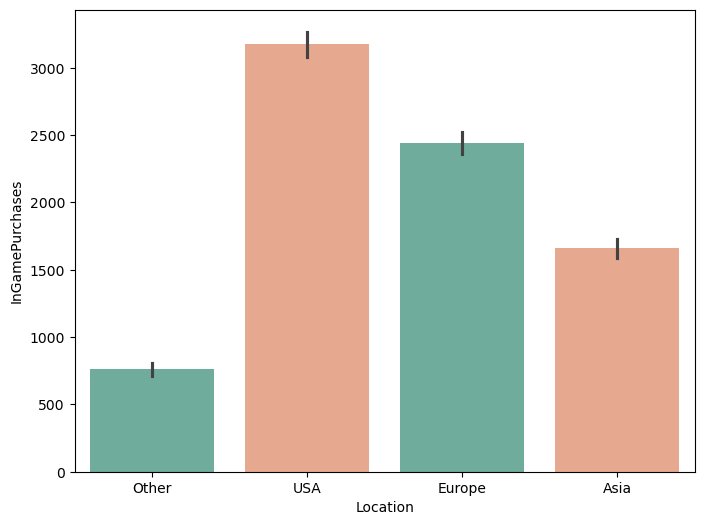

In [74]:
plt.figure(figsize=(8,6))
sns.barplot(data = data, x = 'Location', y = 'InGamePurchases', estimator = sum,palette=['#65b6a0', '#f4a382'])
plt.show()

C:\Users\Anuj\AppData\Local\Temp\ipykernel_25388\3703435053.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = data, x = 'GameGenre', y = 'InGamePurchases', estimator = sum,palette=['#65b6a0', '#f4a382'])
C:\Users\Anuj\AppData\Local\Temp\ipykernel_25388\3703435053.py:2: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data = data, x = 'GameGenre', y = 'InGamePurchases', estimator = sum,palette=['#65b6a0', '#f4a382'])


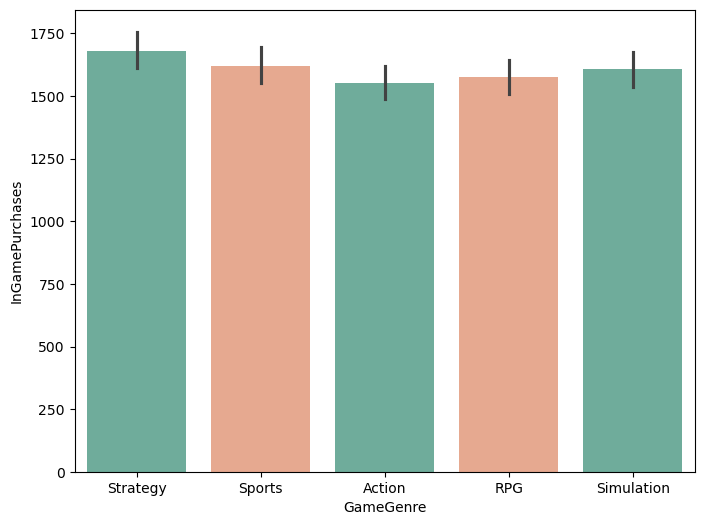

In [75]:
plt.figure(figsize=(8,6))
sns.barplot(data = data, x = 'GameGenre', y = 'InGamePurchases', estimator = sum,palette=['#65b6a0', '#f4a382'])
plt.show()